# Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Reading in Training data

In [2]:
data = pd.read_csv('../input/twitter-sentiment-analysis-hatred-speech/train.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Data Analysis and pre-processing

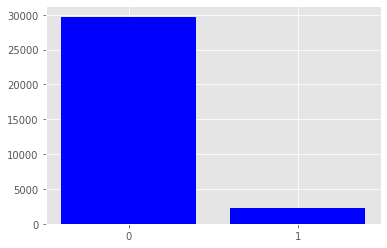

In [4]:
sns.countplot(x="laebls",data=data)


<BarContainer object of 2 artists>

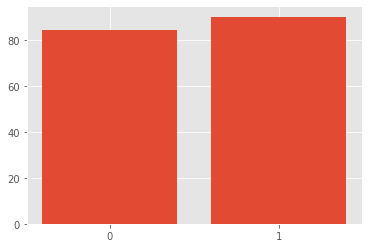

In [5]:
'''Analysing the avarage length of tweets per class'''
data_0 = data[data['label'] == 0]['tweet']
len_avg0 = sum([len(tweet) for tweet in data_0]) / len(data_0)

data_1 = data[data['label'] == 1]['tweet']
len_avg1 = sum([len(tweet) for tweet in data_1]) / len(data_1)

plt.bar(['0', '1'], [len_avg0, len_avg1])


# Forming the Corpus

In [6]:
corpus = []
for tweet in data['tweet']:
    corpus.append(tweet)

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# Padding the Sequence

In [8]:
max_seq_len = max([len(i) for i in corpus])
input_sequences = []
for tweet in corpus:
    token_list = tokenizer.texts_to_sequences([tweet])[0] 
    input_sequences.append(token_list)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))

# Train_test_split

In [11]:
split = int(.2 * len(corpus)) 
rand_row_num = np.random.randint(0, len(corpus), split)

X_test = np.array([input_sequences[i] for i in rand_row_num])
y_test = np.array([labels[i] for i in rand_row_num])

X_train = np.delete(input_sequences, rand_row_num, axis=0)
y_train = np.delete(labels, rand_row_num, axis=0)

In [12]:
len(X_train)

26151

In [13]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)

# Model 

In [14]:
model = tf.keras.Sequential([
    layers.Embedding(total_words, 5, input_length=max_seq_len),
    layers.Bidirectional(layers.LSTM(8, return_sequences=True)),
    layers.Dropout(0.2),
    layers.LSTM(8),
    layers.Dense(8, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 274, 5)            229450    
_________________________________________________________________
bidirectional (Bidirectional (None, 274, 16)           896       
_________________________________________________________________
dropout (Dropout)            (None, 274, 16)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
Total params: 231,236
Trainable params: 231,236
Non-trainable params: 0
__________________________________________________

# Callback

In [16]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10 ** epoch)

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

# Training

In [18]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, callbacks=[lr_scheduler])

Epoch 1/5
409/409 [==============================] - 19s 33ms/step - loss: 0.6920 - accuracy: 0.8580
Epoch 2/5
409/409 [==============================] - 13s 32ms/step - loss: 0.6847 - accuracy: 0.9317
Epoch 3/5
409/409 [==============================] - 14s 33ms/step - loss: 0.4425 - accuracy: 0.9307
Epoch 4/5
409/409 [==============================] - 13s 32ms/step - loss: 0.2055 - accuracy: 0.9353
Epoch 5/5
409/409 [==============================] - 14s 35ms/step - loss: 0.1030 - accuracy: 0.9629


# LR v/s Loss

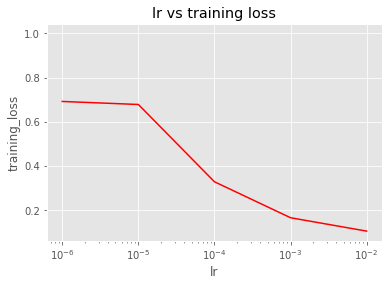

In [19]:
loss = history.history['loss']
lr = history.history['lr']
style.use('ggplot')
plt.semilogx(1e-6, 1, 0, 0.5)
plt.title('lr vs training loss')
plt.xlabel('lr')
plt.ylabel('training_loss')
plt.plot(lr, loss, 'r')

In [20]:
model = tf.keras.Sequential([
    layers.Embedding(total_words, 5, input_length=max_seq_len),
    layers.Bidirectional(layers.LSTM(8, return_sequences=True)),
    layers.Dropout(0.2),
    layers.LSTM(8),
    layers.Dense(8, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-2), loss=tf.keras.losses.CategoricalCrossentropy(),
             metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, batch_size=64, epochs=5)

Epoch 1/5
409/409 [==============================] - 18s 36ms/step - loss: 0.2357 - accuracy: 0.9310
Epoch 2/5
409/409 [==============================] - 14s 35ms/step - loss: 0.0653 - accuracy: 0.9789
Epoch 3/5
409/409 [==============================] - 14s 34ms/step - loss: 0.0235 - accuracy: 0.9930
Epoch 4/5
409/409 [==============================] - 15s 36ms/step - loss: 0.0114 - accuracy: 0.9968
Epoch 5/5
409/409 [==============================] - 15s 36ms/step - loss: 0.0059 - accuracy: 0.9985


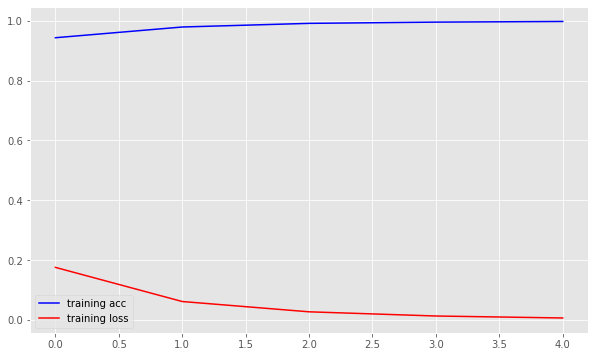

In [23]:
'''Visualizing training accuracy and loss per epoch to eliminate the potential threat of overfitting'''
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(history.history['accuracy'])), history.history['accuracy'], 'b', label='training acc')
plt.plot(np.arange(len(history.history['accuracy'])), history.history['loss'], 'r', label='training loss')
plt.legend(loc='best')
plt.show()

# Evaluating Model's performance with the validation set

In [24]:
model.evaluate(X_test, y_test, batch_size=64)

100/100 [==============================] - 3s 19ms/step - loss: 0.2022 - accuracy: 0.9625


[0.20218662917613983, 0.9624530673027039]

In [25]:
y_test = np.array([labels[i] for i in rand_row_num])

## Creating the encoder dict to understand the pattern in the wrong predictions

In [26]:
encoder_dict = {val: key for key, val in tokenizer.word_index.items()}

In [27]:
preds = model.predict(X_test)
pre = []
for pred in preds:
    pre.append(np.argmax(pred))
pre = np.array(pre)
np.unique(pre, return_counts=True)

(array([0, 1]), array([5995,  397]))

In [28]:
'''Analysing false negative predictions'''
preds = model.predict(X_test)
for pred in range(len(preds)):
    temp = np.argmax(preds[pred])
    if temp != y_test[pred]:
        tweet = ''
        for word in X_test[pred]:
            if word == 0:
                continue
            else:
                tweet += encoder_dict[word]
                tweet += ' '
        print(tweet)
        print(f'predicted: {preds[pred]}\nactual: {y_test[pred]}')
        print('--------------------------------------------------')

user next to a police vehicle this anc can hang a poster and sing kill all whites and nothing happens to him â¦ 
predicted: [0.99395025 0.0060498 ]
actual: 1
--------------------------------------------------
how will society overcome is it possible to end racism it happens one person at a time spirituality 
predicted: [9.998661e-01 1.338248e-04]
actual: 1
--------------------------------------------------
user hell no only user has that right to fire and hire user 
predicted: [0.10646967 0.8935303 ]
actual: 0
--------------------------------------------------
listening to sam cooke in this ridiculously packed pavillion's to help keep me calm breathe procrastinate shitshow 
predicted: [9.9950230e-01 4.9769453e-04]
actual: 1
--------------------------------------------------
in the case of the commonwealth of the internet vs user the evidence proved him guilty of antisemitism and misogyny 
predicted: [0.9578488  0.04215115]
actual: 1
--------------------------------------------------
w